In [1]:
!pip install matplot
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [37]:
local_path = "./data/accesslog/reports"
filename = "/accesslog-v3-50-10-1-0-0.csv"
graphic_name = f"{local_path}{filename.split('.')[0]}_ResponseTimesPercentiles-mp.png"

# # load local file
X = pd.read_csv(local_path + filename)
X.head()

timeStamp  elapsed              label  responseCode responseMessage  \
0  1656407368137       29  PostgreSQL 50-0-0           200              OK   
1  1656407368138       29  PostgreSQL 50-0-0           200              OK   
2  1656407368137       29  PostgreSQL 50-0-0           200              OK   
3  1656407368156       11  PostgreSQL 50-0-0           200              OK   
4  1656407368137       29  PostgreSQL 50-0-0           200              OK   

                threadName dataType  success  failureMessage  bytes  \
0  Thread Group 50-0-0 1-2     text     True             NaN    164   
1  Thread Group 50-0-0 1-4     text     True             NaN    164   
2  Thread Group 50-0-0 1-1     text     True             NaN    164   
3  Thread Group 50-0-0 1-5     text     True             NaN    136   
4  Thread Group 50-0-0 1-3     text     True             NaN    164   

   sentBytes  grpThreads  allThreads                                 URL  \
0        128           5           5  http://localhost:8083/?s=2&e=2&u=2   
1        128           5           5  http://localhost:8083/?s=4&e=4&u=4   
2        128           5           5  http://localhost:8083/?s=1&e=1&u=1   
3        128           5           5  http://localhost:8083/?s=5&e=5&u=5   
4        128           5           5  http://localhost:8083/?s=3&e=3&u=3   

   Latency  IdleTime  Connect  
0       29         0       13  
1       29         0       13  
2       29         0       13  
3       11         0        0  
4       29         0       13

In [38]:
X.label.unique()

array(['PostgreSQL 50-0-0', 'MongoDB 50-0-0'], dtype=object)

In [39]:
elapsed = pd.DataFrame(columns=X.label.unique())
quantiles = np.arange(0,0.99,0.01) # np.append(np.arange(0,1,0.01),1)

for col in elapsed.columns:
    elapsed[col] = X.elapsed[X.label == col].quantile(quantiles)


0.895147153528439 17


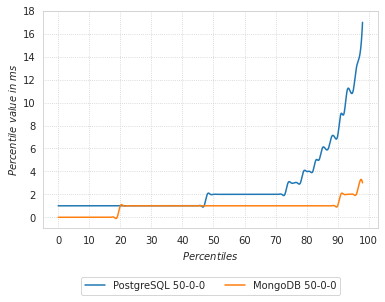

In [77]:
# first plot
import seaborn as sns
from scipy.interpolate import make_interp_spline

NUM_COLORS = 20
LINE_STYLES = ['solid', 'dashed']
NUM_STYLES = len(LINE_STYLES)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks(range(0,110,10))
clrs = sns.color_palette('husl', n_colors=NUM_COLORS)
column_size = len(elapsed.columns)

Y_min = None
Y_max = None
for i, col in enumerate(elapsed.columns):

    X_ = np.linspace(quantiles.min(), quantiles.max(), 500)
    #print(elapsed)
    X_Y_Spline = make_interp_spline(quantiles, elapsed[col])
    Y_ = X_Y_Spline(X_)
    if Y_min is None:
        Y_min = Y_.min()
    if Y_max is None:
        Y_max = Y_.max()

    #print(X_*100)
    lines = ax.plot(X_*100, Y_, label=col)


    if column_size > 2:
        #lines[0].set_color(clrs[i])
        if 'PostgreSQL' in col:
            lines[0].set_linestyle('solid')
        else:
            lines[0].set_linestyle('dashed')
print(Y_min, round(Y_max))
plt.yticks(np.arange(0, round(Y_max)+2, round(Y_max/7)))
#plt.grid()
ax.grid(linestyle=':', linewidth='0.8')
plt.ylabel('$\it{Percentile}$ $\it{value}$ $\it{in}$ $\it{ms}$')
plt.xlabel('$\it{Percentiles}$')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.savefig(graphic_name,
            dpi=800.,
            facecolor='white',
            bbox_inches='tight',
            transparent=False)



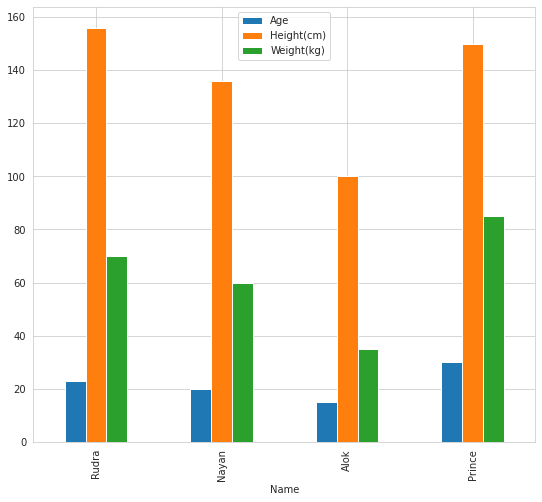

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

data=[["Rudra",23,156,70],
      ["Nayan",20,136,60],
      ["Alok",15,100,35],
      ["Prince",30,150,85]
      ]

df=pd.DataFrame(data,columns=["Name","Age","Height(cm)","Weight(kg)"])
df.plot(x="Name", y=["Age", "Height(cm)", "Weight(kg)"], kind="bar",figsize=(9,8))
plt.show()

In [9]:
X.head()

timeStamp  elapsed              label  responseCode responseMessage  \
0  1656407394975       21  PostgreSQL 70-0-0           200              OK   
1  1656407394974       24  PostgreSQL 70-0-0           200              OK   
2  1656407394998        2     MongoDB 70-0-0           200              OK   
3  1656407394990       10  PostgreSQL 70-0-0           200              OK   
4  1656407394974       26  PostgreSQL 70-0-0           200              OK   

                threadName dataType  success  failureMessage  bytes  \
0  Thread Group 70-0-0 1-6     text     True             NaN    136   
1  Thread Group 70-0-0 1-4     text     True             NaN    164   
2  Thread Group 70-0-0 1-6     text     True             NaN    177   
3  Thread Group 70-0-0 1-7     text     True             NaN    136   
4  Thread Group 70-0-0 1-5     text     True             NaN    136   

   sentBytes  grpThreads  allThreads                                 URL  \
0        128           7           7  http://localhost:8083/?s=6&e=6&u=6   
1        128           7           7  http://localhost:8083/?s=4&e=4&u=4   
2        128           7           7  http://localhost:8082/?s=6&e=6&u=6   
3        128           7           7  http://localhost:8083/?s=7&e=7&u=7   
4        128           7           7  http://localhost:8083/?s=5&e=5&u=5   

   Latency  IdleTime  Connect  
0       21         0       14  
1       23         0       15  
2        2         0        1  
3       10         0        0  
4       26         0       15

In [10]:
# # load local file
df = pd.read_csv("/home/mathias/Repositories/eval-of-nosql/data/pakwheels/reports/pakwheels-v5-10-100_AggregateReport.csv")
df.head()


Label  Anz. der Proben  Durchschnitt  Mittel  90% Line  \
0        Redis 5-0-1               50             1       1         2   
1   PostgreSQL 5-0-1               49             1       1         2   
2   PostgreSQL 5-1-1               50             2       1         3   
3        Redis 5-1-1               50             1       1         2   
4  PostgreSQL 50-0-1              500             3       1        12   

   95% Line  99% Line  Min  Max % Fehler Durchsatz   KB/sek Std. Dev.  
0         2         3    0    3    0,00%      69,6   7653,2      0,63  
1         3         4    1    4    0,00%      68,9   7573,9      0,73  
2         8        37    1   37    0,00%      64,6   7099,6      5,75  
3         2         4    0    4    0,00%      68,0   7476,3      0,65  
4        18        34    0   35    0,00%     531,3  58395,2      6,43

In [11]:
df = df[["Label", "Durchschnitt", "Mittel", "Durchsatz"]]
df

Label  Durchschnitt  Mittel Durchsatz
0         Redis 5-0-1             1       1      69,6
1    PostgreSQL 5-0-1             1       1      68,9
2    PostgreSQL 5-1-1             2       1      64,6
3         Redis 5-1-1             1       1      68,0
4   PostgreSQL 50-0-1             3       1     531,3
5        Redis 50-0-1             1       1     551,9
6   PostgreSQL 50-1-1             5       2     524,7
7        Redis 50-1-1             1       1     547,0
8   PostgreSQL 60-0-1             6       3     631,6
9        Redis 60-0-1             2       1     662,3
10  PostgreSQL 60-1-1            12       9     626,3
11       Redis 60-1-1             3       2     660,1
12  PostgreSQL 80-0-1            56      50     552,5
13       Redis 80-0-1             6       5     578,0
14  PostgreSQL 80-1-1            49      45     615,4
15       Redis 80-1-1             5       3     643,6
16             Gesamt            14       3      35,3

In [12]:
df.drop(df.tail(1).index,inplace=True)
df

Label  Durchschnitt  Mittel Durchsatz
0         Redis 5-0-1             1       1      69,6
1    PostgreSQL 5-0-1             1       1      68,9
2    PostgreSQL 5-1-1             2       1      64,6
3         Redis 5-1-1             1       1      68,0
4   PostgreSQL 50-0-1             3       1     531,3
5        Redis 50-0-1             1       1     551,9
6   PostgreSQL 50-1-1             5       2     524,7
7        Redis 50-1-1             1       1     547,0
8   PostgreSQL 60-0-1             6       3     631,6
9        Redis 60-0-1             2       1     662,3
10  PostgreSQL 60-1-1            12       9     626,3
11       Redis 60-1-1             3       2     660,1
12  PostgreSQL 80-0-1            56      50     552,5
13       Redis 80-0-1             6       5     578,0
14  PostgreSQL 80-1-1            49      45     615,4
15       Redis 80-1-1             5       3     643,6

                Label  Col_1  Mittel
0         Redis 5-0-1      1       1
1    PostgreSQL 5-0-1      1       1
2    PostgreSQL 5-1-1      2       1
3         Redis 5-1-1      1       1
4   PostgreSQL 50-0-1      3       1
5        Redis 50-0-1      1       1
6   PostgreSQL 50-1-1      5       2
7        Redis 50-1-1      1       1
8   PostgreSQL 60-0-1      6       3
9        Redis 60-0-1      2       1
10  PostgreSQL 60-1-1     12       9
11       Redis 60-1-1      3       2
12  PostgreSQL 80-0-1     56      50
13       Redis 80-0-1      6       5
14  PostgreSQL 80-1-1     49      45
15       Redis 80-1-1      5       3


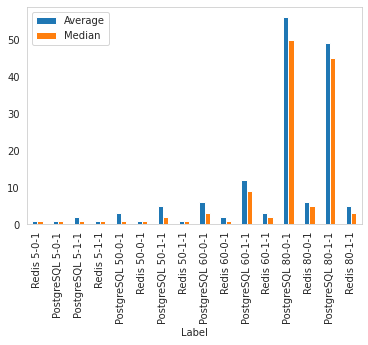

In [13]:
df=pd.DataFrame(df,columns=["Label","Durchschnitt","Mittel"])
print(df.rename(columns={'Durchschnitt': 'Col_1', 'C': 'Col_3'}))
df.plot(x="Label", y=["Durchschnitt","Mittel"], kind="bar", grid=False)
max_value = df[["Durchschnitt","Mittel"]].max().max()
min_value = df[["Durchschnitt","Mittel"]].min().min()
#plt.yticks(np.arange(min_value, max_value, 1.0))
plt.legend(['Average', 'Median'])
plt.show()


In [14]:
df['Label'] = (df['Label'].str.split(' ')).apply(lambda x: f"{x[0]} {'-'.join(x[1].split('-')[:-1])}")

In [15]:
df.sort_values(by='Label', key=lambda c: (c.str.lower()))

Label  Durchschnitt  Mittel
1    PostgreSQL 5-0             1       1
2    PostgreSQL 5-1             2       1
4   PostgreSQL 50-0             3       1
6   PostgreSQL 50-1             5       2
8   PostgreSQL 60-0             6       3
10  PostgreSQL 60-1            12       9
12  PostgreSQL 80-0            56      50
14  PostgreSQL 80-1            49      45
0         Redis 5-0             1       1
3         Redis 5-1             1       1
5        Redis 50-0             1       1
7        Redis 50-1             1       1
9        Redis 60-0             2       1
11       Redis 60-1             3       2
13       Redis 80-0             6       5
15       Redis 80-1             5       3